# Quantile Regression
This project focuses on quantile regression. Confidence intervals and 

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image


import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import math


In [2]:
data = '/Users/simitiangreg/Documents/econ_143/Datasets/'
graphics = '/Users/simitiangreg/Documents/econ_143/Graphics/'

The file brazil_pnad96.out contains 65,801 comma delimited records drawn from the 1996 round of the Brazilian Pesquisas Nacional por Amostra de Domicilos (PNAD96). An overview of education, earnings and inequality in Brazil is provided by Blom et al. (2001). This is the same dataset you used in Problem Set #3.

**References**
Blom, Andreas, Holm-Nielsen, Lauritz, and Verner, Dorte, "Education, earnings, and inequality in Brazil, 1982-1998: implications for education policy", _Peabody Journal of Education_ 76, 3-4 (2001), pp. 180 - 221.

In [3]:
pnad96 = pd.read_csv(data + 'Brazil_1996PNAD.out', header = 0, sep='\t+', engine='python')

# Find relevant estimation subsample
sample = pnad96.loc[(pnad96['MONTHLY_EARNINGS'] > 0) & (pnad96['AgeInDays'] >= 20)  & (pnad96['AgeInDays'] <= 60)]

#Display the first few rows of the dataframe
sample.describe()

,AgeInDays,YRSSCH,MONTHLY_EARNINGS,Father_NoSchool,Father_Incomplete1stPrimary,Father_Complete1stPrimary,Father_Incomplete2ndPrimary,Father_Complete2ndPrimary,Father_IncompleteSecondary,Father_CompleteSecondary,...,Mother_NoSchool,Mother_Incomplete1stPrimary,Mother_Complete1stPrimary,Mother_Incomplete2ndPrimary,Mother_Complete2ndPrimary,Mother_IncompleteSecondary,Mother_CompleteSecondary,Mother_IncompleteHigher,Mother_CompleteHigher,Mother_DontKnow
count,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,...,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000
mean,37.055054,5.830462,634.184245,0.282569,0.205037,0.139691,0.034311,0.054832,0.051808,0.039531,...,0.334125,0.189015,0.136199,0.041493,0.065093,0.032691,0.045148,0.016921,0.054760,0.084553
std,10.262022,4.217958,1104.788945,0.450253,0.403732,0.346670,0.182028,0.227655,0.221642,0.194857,...,0.471688,0.391524,0.343003,0.199430,0.246693,0.177827,0.207630,0.128978,0.227514,0.278218
min,20.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.607800,3.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.188910,5.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44.681720,8.000000,602.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,60.000000,15.000000,50000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Warm-Up ##

1. Compute the least squares fit of ln(MONTHLY_EARNINGS) onto a constant YRSSCH, AgeInDays, and AgeInDays squared.   

2. Create a dummy variable for each of the $16$ possible schooling levels. Compute the least squares fit of ln(MONTHLY_EARNINGS) onto each of the $16$ dummy variables, AgeInDays, and AgeInDays squared (exclude a constant from this regression).    

3. Construct a plot with the regression fits from parts (1) and (2) above on the same same figure holding AgeInDays fixed at $40$, but varying YRSSCH. Comment on your findings.

$$ ******-----------------------------------------------------------------****** $$
$$ ******------------------------------ \text{Question 1} ------------------------------****** $$
$$ ******-----------------------------------------------------------------****** $$



In [4]:
sample = sm.add_constant(sample)
sample['AgeInDays_sq'] = sample['AgeInDays']**2
sample['log_earnings'] = np.log(sample['MONTHLY_EARNINGS'])

design_1 = sample[['const', 'YRSSCH', 'AgeInDays', 'AgeInDays_sq']]
model_1 = sm.OLS((sample['log_earnings']), design_1)

model_results_1 = model_1.fit()
print(model_results_1.summary())

                            OLS Regression Results                            
Dep. Variable:           log_earnings   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                 1.340e+04
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        00:34:48   Log-Likelihood:                -64169.
No. Observations:               55551   AIC:                         1.283e+05
Df Residuals:                   55547   BIC:                         1.284e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.0446      0.043     70.493   

$$ ******-----------------------------------------------------------------****** $$
$$ ******------------------------------ \text{Question 2} ------------------------------****** $$
$$ ******-----------------------------------------------------------------****** $$



In [5]:
#make categories from year, then create a dummy dataframe
sample['YRSSCH_cat'] = sample['YRSSCH'].astype('category')
dummy_df = pd.get_dummies(sample[['YRSSCH_cat']])
sample = pd.concat([sample, dummy_df], axis=1)


#remove the original numerical YRSSCH, and the constant
design_1a = sample[['AgeInDays', 'AgeInDays_sq']]
design_2 = pd.concat([design_1a, dummy_df], axis=1)

model_2 = sm.OLS(sample['log_earnings'], design_2)
model_results_2 = model_2.fit()
print(model_results_2.summary())


                            OLS Regression Results                            
Dep. Variable:           log_earnings   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     2450.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        00:34:48   Log-Likelihood:                -63744.
No. Observations:               55551   AIC:                         1.275e+05
Df Residuals:                   55533   BIC:                         1.277e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
AgeInDays         0.0857      0.002     36.322

$$ ******-----------------------------------------------------------------****** $$
$$ ******------------------------------ \text{Question 3} ------------------------------****** $$
$$ ******-----------------------------------------------------------------****** $$



In [6]:
sample['y_pred1'] = model_results_1.predict(sample[['const', 'YRSSCH', 'AgeInDays', 'AgeInDays_sq']])
sample['y_pred2'] = model_results_2.predict(sample[['AgeInDays', 'AgeInDays_sq', 'YRSSCH_cat_0', 'YRSSCH_cat_1',
                                                    'YRSSCH_cat_2', 'YRSSCH_cat_3', 'YRSSCH_cat_4', 'YRSSCH_cat_5',
                                                    'YRSSCH_cat_6', 'YRSSCH_cat_7', 'YRSSCH_cat_8', 'YRSSCH_cat_9',
                                                    'YRSSCH_cat_10', 'YRSSCH_cat_11', 'YRSSCH_cat_12', 'YRSSCH_cat_13',
                                                    'YRSSCH_cat_14', 'YRSSCH_cat_15']])

sample40 = sample.loc[(sample['AgeInDays'] >= 39.5) & (sample['AgeInDays'] <= 40.5)]

sample40 = sample40.sort_values(by='YRSSCH')
sample40 = sample40.reset_index(drop=True)
sample40.head(5)

,const,AgeInDays,YRSSCH,MONTHLY_EARNINGS,Father_NoSchool,Father_Incomplete1stPrimary,Father_Complete1stPrimary,Father_Incomplete2ndPrimary,Father_Complete2ndPrimary,Father_IncompleteSecondary,...,YRSSCH_cat_8,YRSSCH_cat_9,YRSSCH_cat_10,YRSSCH_cat_11,YRSSCH_cat_12,YRSSCH_cat_13,YRSSCH_cat_14,YRSSCH_cat_15,y_pred1,y_pred2
0,1.0,40.21629,0,85,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.175469,5.165203
1,1.0,39.57837,0,230,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.164470,5.155323
2,1.0,40.26010,0,100,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.176198,5.165855
3,1.0,39.93977,0,112,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,5.170792,5.161008
4,1.0,40.02190,0,400,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.172195,5.162268


Text(0, 0.5, 'Log Monthly Earnings')

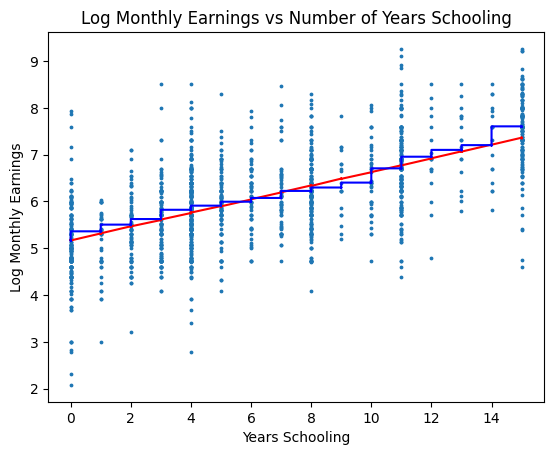

In [7]:
x = sample40['YRSSCH']
y = sample40['log_earnings']
y1 = sample40['y_pred1']
y2 = sample40['y_pred2']


plt.scatter(x, y, s=3)
plt.plot(x, y1, '-r')
plt.step(x, y2, '-b')

plt.title('Log Monthly Earnings vs Number of Years Schooling')
plt.xlabel('Years Schooling')
plt.ylabel('Log Monthly Earnings')

$------------------------\text{Question 3 ANSWER}--------------------$

$\text{Here we can see that the regression from the polynomial model is very close to that of the dummy model.}
\\ \text{Basically the continuous YRSSCH and the level-wise dummies capture the same information about the underlying model.}
\\ \text{One may argue that the polynomial model is better as it uses less parameters.}$

$----------------------------------------------------$


## Exploring the conditional distribution of earnings given schooling ##

In this part of the problem set you will explore the conditional distribution of earnings given schooling and age using quantile regression. There are a variety of ways to undertake the computations described below. Tools you may need include a "for loop", a Pandas dataframe for organizing your results and setting up your regressor matrix, the numpy.quantile and numpy.sort (to find order statistics) will be useful for find quantile point estimates and constructing standard errors. To construct standard errors for your minimum distance estimates you will need to do some basic matrix multiplication. This is best done using Numpy.

4. Construct two histograms; one each for the distribution of the logarithm of monthly earnings given YRSSCH = 0 and another YRSSCH = 8. Comment on any differences.

5. Consider the following $L=8$ age ranges: $\left[20,25\right),\left[25,30\right),\left[30,35\right),\left[35,40\right),\left[40,45\right),\left[45,50\right),\left[50,55\right),\left[55,60\right]$. Let $K=16$ be the number of distinct schooling values. For each of the $K\times L=8\times16=128$ years of schooling and age range combinations with at least $30$ observations in the dataset estimate the 10th, 25th, 50th, 75th and 90th quantiles of the distribution of log earnings. For each conditional quantile construct a confidence interval using order statistics as described in lecture. Using this confidence interval construct an asymptotic variance estimate.     

6. Inspect your standard error estimates. Are any of them are zero? Why? Inspect the distribution of MONTHLY_EARNINGS. Is MONTHLY_EARNINGS a continuously-valued random variable? Relate what you find to the phenomena of standard error estimates of zero [1 paragraph].    

7. Assume that, for the five estimated quantiles, the conditional quantile function of the logarithm of monthly earnings given schooling and age is a linear function of YRSSCH, AgeInDays, and AgeInDays squared (you may use the mid-point of each of the age ranges as your measure of “age”). Estimate the parameters indexing each of the five conditional quantile functions by minimum distance as described in lecture. You should exclude all cells with less that 30 observations and/or where the estimated standard error is zero. How does the coefficient on schooling vary with the quantile under consideration? How does it compare to that computed in question (2) above?

8. Summarize, in words, your analysis. How do earnings vary with education in Brazil? [4 to 6 paragraphs]

9. Repeat your analysis in part (7) for all “centiles” 5,6,7....,94,95. Plot “centile” on the x-axis and the corresponding coefficient on schooling on the y-axis. Also plot the corresponding point-wise 95 percent confidence band. Comment on your graph [1 to 3 paragraphs].

$$ ******----------------------------------------------****** $$
$$ ******------------------- \text{Question 4} ---------------****** $$
$$ ******----------------------------------------------****** $$



In [8]:
sample_years0 = sample[sample['YRSSCH'] == 0]
sample_years8 = sample[sample['YRSSCH'] == 8]


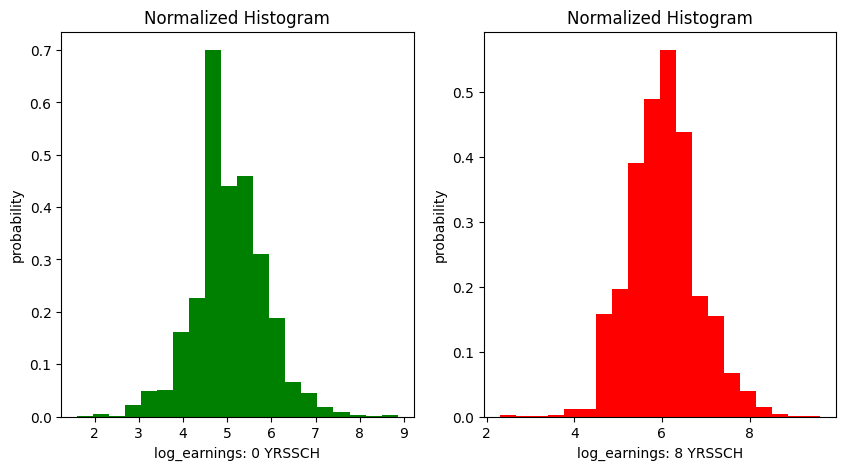

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title('0 Years of Schooling')
ax2.set_title('8 Years of Schooling')

ax1.hist(sample_years0['log_earnings'], bins=20, density =True, color = 'green')
ax2.hist(sample_years8['log_earnings'], bins=20, density =True, color = 'red')

ax1.set_xlabel('log_earnings: 0 YRSSCH')
ax1.set_ylabel('probability')
ax1.set_title('Normalized Histogram')

ax2.set_xlabel('log_earnings: 8 YRSSCH')
ax2.set_ylabel('probability')
ax2.set_title('Normalized Histogram')

plt.show()

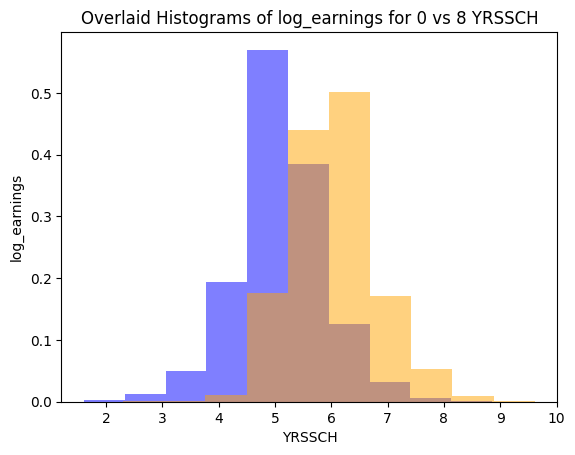

In [10]:
plt.title('Overlaid Histograms of log_earnings for 0 vs 8 YRSSCH')
plt.xlabel('YRSSCH')
plt.ylabel('log_earnings')

plt.hist(sample_years0['log_earnings'], density='True', alpha=.5, color='blue')
plt.hist(sample_years8['log_earnings'], density='True', alpha=.5, color='orange')
plt.show()

$------------------------\text{Question 4 ANSWER}--------------------$

$\\ \text{Log earnings seems higher for those with 8 years of schooling.}
\\ \text{We can run a Mann-Whitney test if we want to formally ask whether the distributions are the same.}
\\ \text{Our p-value is so close to zero that python just reports zero, we can be sure the two distributions are not the same. Visually speaking, although it may look liek the means are 'close'}
\\ \text{the fact that we are in log unit should remind the reader that this is a huge difference in regular units}$

$----------------------------------------------------$


$$ ******----------------------------------------------****** $$
$$ ******------------------- \text{Question 5} ---------------****** $$
$$ ******----------------------------------------------****** $$



In [11]:
############### FIRST

def data_sample(data, filter=0, val=30):
    
    age_ranges = range(20, 61, 5)
    #add range column
    data['Range'] = pd.cut(data['AgeInDays'], age_ranges, right = False, include_lowest=True)

    #make new string columns and convert so that we can concat, then make dummoies off the concats
    data['YRSSCH_str'] = data['YRSSCH'].astype('string')
    data['Range_str'] = data['Range'].astype('string')
    data['Combined'] = data['YRSSCH_str'].str.cat(data['Range_str'], sep=', ')

    datadummy_128 = pd.get_dummies(data['Combined'])

    #if we want to filter, then run this chunk
    if filter == 1:
        datasum_128 = datadummy_128.sum()
        databool_128 = datasum_128 >= val
        datadummysubset_val = datadummy_128.loc[:, databool_128]
        datasample_218 = pd.concat([data[['log_earnings', 'Combined']], datadummysubset_val], axis=1)
    

    if filter == 0:
        datasample_218 = pd.concat([sample[['log_earnings', 'Combined']], datadummy_128], axis=1)
    
    return datasample_218

In [12]:
########## INTERMEDIATE

def table_builder(data, filter=0, val=30):
    
    age_ranges = range(20, 61, 5)
    #add range column
    data['Range'] = pd.cut(data['AgeInDays'], age_ranges, right = False, include_lowest=True)

    #make new string columns and convert so that we can concat, then make dummoies off the concats
    data['YRSSCH_str'] = data['YRSSCH'].astype('string')
    data['Range_str'] = data['Range'].astype('string')
    data['Combined'] = data['YRSSCH_str'].str.cat(data['Range_str'], sep=', ')

    datadummy_128 = pd.get_dummies(data['Combined'])

    #if we want to filter, then run this chunk
    if filter == 1:
        datasum_128 = datadummy_128.sum()
        databool_128 = datasum_128 >= val
        datadummysubset_val = datadummy_128.loc[:, databool_128]
        datasample_218 = pd.concat([data[['log_earnings', 'Combined']], datadummysubset_val], axis=1)
    

    if filter == 0:
        datasample_218 = pd.concat([sample[['log_earnings', 'Combined']], datadummy_128], axis=1)

    df = pd.DataFrame()
    df.rename

    for i in range(0+2, len(datasample_218.columns)):
        subsample_i = datasample_218[datasample_218.iloc[:,i] == 1]
        col_i = subsample_i['log_earnings'].quantile([.1, .25,.5,.75,.9])
        num_obs = len(subsample_i)
        col_i = np.append(col_i, num_obs)
        col_i = pd.Series(col_i)
        df = pd.concat([df, col_i], axis=1)

    real = df.T
    real = real.reset_index(drop=True)
    
    col_names = datasample_218.columns[2:]
    df2 = pd.DataFrame(col_names, range(0,len(datasample_218.columns)-2))

    real = pd.concat([real, df2], axis=1)
    real = real.rename(columns={0: '10th Percentile', 1: '25th Percentile', 2: '50th Percentile', 3: '75th Percentile', 4: '90th Percentile', 5:'num_obs'})
    real.columns.values[6] = '[YRSSCH, Age_Bins]'

    return real

In [13]:
unfiltered = table_builder(sample, filter=0, val = 30)
filtered_30 = table_builder(sample, filter=1, val = 30)

In [14]:
filtered_30.head(5)

,10th Percentile,25th Percentile,50th Percentile,75th Percentile,90th Percentile,num_obs,"[YRSSCH, Age_Bins]"
0,3.912023,4.442651,4.787492,5.298317,5.703782,758.0,"0, [20.0, 25.0)"
1,4.094345,4.605170,4.948735,5.480639,5.991465,850.0,"0, [25.0, 30.0)"
2,4.158883,4.605170,5.010635,5.484797,5.991465,1001.0,"0, [30.0, 35.0)"
3,4.382027,4.718499,5.099866,5.521461,5.991465,981.0,"0, [35.0, 40.0)"
4,4.094345,4.718499,5.049856,5.645441,6.144130,1095.0,"0, [40.0, 45.0)"


$----------------------------------------------------------$

$ \text{For each conditional quantile construct a confidence interval using order statistics as described in lecture.} \\ \text{Using this confidence interval construct an asymptotic variance estimate} $

$ \text{To get standard errors we start with the CDF:}
\\ F_y(y) = CDF, 
\\ Q_y(\tau) = CDF^{-1}
\\ \text{Pr(Random draw above } y_{\tau} \text{)}: p=1-\tau
\\ \text{Pr(Random draw below } y_{\tau} \text{)}: p= \tau 
\\ \tau = \frac{j}{N-1}
\\ \hat q_{\tau} = X_{j}
\\ \text{}
\\ Pr(X_j \le y_{\tau} \le X_k)  =  Pr(y_{\tau} \ge X_j)- Pr(y_{\tau} \le X_k) = Pr( X_j \le y_{\tau}) - Pr( X_k \ge y_{\tau})
\\ Pr( X_j \le y_{\tau}) = \text{j-th order statistic is less than the value at the quantile of interest}
\\ \text{}
\\ Pr( X_j \le y_{\tau}) = \text{j or more observations are less than the value at the quantile of interest}
\\ \text{This follows from the distribution of a order statistic.}
\\ \text{An intuitive way to think about this is that there needs to be at least j arrivals before the value at the quantile, in order for the condition to be met.}
\\ \text{}
\\ Pr( X_j \le y_{\tau}) = \sum_{i=j}^{N}Pr\text{(exactly i observations are less than the value at the quantile of interest)}
\\ Pr( X_j \le y_{\tau}) = \sum_{i=j}^{N}Pr(i \le y_{\tau})
\\ Pr( X_j \le y_{\tau}) = \sum_{i=j}^{N}(\binom{N}{i} (F_y(y_{\tau}))^i (1- F_y(y_{\tau}))^{N-i})
\\ Pr( X_j \le y_{\tau}) = \sum_{i=j}^{N}(\binom{N}{i} (\tau)^i (1- \tau)^{N-i})
\\ \text{}
\\ Pr(X_j \le y_{\tau} \le X_k) = \sum_{i=j}^{N}(\binom{N}{i} (\tau)^i (1- \tau)^{N-i}) - \sum_{i=k}^{N}(\binom{N}{i} (\tau)^i (1- \tau)^{N-i})
\\ Pr(X_j \le y_{\tau} \le X_k) = \sum_{i=j}^{k-1}(\binom{N}{i} (\tau)^i (1- \tau)^{N-i})
\\ \text{}
\\ \text{OR}
\\ \text{}
\\ Pr( X \le y_{\tau}) = \sum_{i=j}^{N}(\binom{N}{i} (\tau)^i (1- \tau)^{N-i})
\\ Pr( Z \le j) \text{ with  Z aprox binomial}(N, \tau)
\\ -------------------------------------------------------------
$






$
\text{Asymptotically Normal}
\\ j = \lfloor{N \tau - l}\rfloor
\\ k = \lceil{N \tau + l}\rceil
\\ Pr(X_j \le y_{\tau}\le X_k)
\\ Pr(\lfloor{N \tau - l}\rfloor \le Z \le \lceil{N \tau + l}\rceil)
\\ \text{}
\\ \text{Substitute using above}
\\ \text{}
\\ Pr(-l \le Z - N \tau \le l)
\\ \text{}
\\ \text{}
\\ \text{Normalize}
\\ \text{}
\\ Pr(\frac{-l}{\sqrt{(N) (\tau) (1- \tau)}} \le \frac{(Z - N \tau)}{\sqrt{(N) (\tau) (1- \tau)}} \le \frac{l}{\sqrt{(N) (\tau) (1- \tau)}})
\\ \text{}
\\ Pr(\frac{-l}{\sqrt{(N) (\tau) (1- \tau)}} \le \frac{\sqrt{N}((\frac{Z}{N}) - \tau)}{\sqrt{(\tau) (1- \tau)}} \le \frac{l}{\sqrt{(N) (\tau) (1- \tau)}})
\\ \text{}
\\ \text{Where: } \sqrt{N}(\frac{Z}{N} - \tau) \xrightarrow[]{D} N(0, (\tau) (1 - \tau))
\\ \text{}
\\ \text{Choose L: }
\\ \frac{l}{\sqrt{(N) (\tau) (1- \tau)}} = Z^{1-\frac{\alpha}{2}}
\\ \text{}
\\ l = \sqrt{(N_l) (\tau) (1- \tau)}Z^{1-\frac{\alpha}{2}}$

$$ \text{Personal Note/ Prof's `Seceret' (Random fact from somewhere else): } \hat \sigma^2 = \frac{(\tau)(1-\tau)}{f_y(y)^2}$$

$
\\ \text{If ran in the usualy way, we get order statistics that are out of bounds, one way to fix this is to make our significance dependant on the sample size.}
\\ \text{One suggestion in office hours was that we can just take the minimum and maximum of the order statistics whenever we run itno this problem,}
\\ \text{however, prof. said that this would violate common methodology in frequentist statistics, as we would be adjusting our estimation after seeing the data.} 
\\ \text{One way around this is to disobey the instructions, and only use subgroups with size >= 52. By testing, I was able to see that this is the number that wo IMPORTANT}
\\ \text{Because of the original filtering, I implement at `staggered' confidence interval size that grows as the number of N grows. }
\\ \text{Later I chose to ommit this and only use N that allows me to use a 95 \% CI at N=30, if 38 > N >= 30 we can use a 80 \%CI}
\\ \text{}
\\ \text{In my code: I coded the following setup:}
\\ \text{(.............................................) conf\_ int = .80}
\\ \text{if N\_ L >=38 :}
\\ \text{........ conf\_ int = .90 if N\_ L >=52 :}
\\ \text{........ conf\_ int = .95 (.............................................)}
\\ \text{if 52 > N >= 38 we can use a 90 \%CI.}
\\ \text{with N >= 52 we can use 95 \%CI.}
\\ \text{}
\\ \text{alternatively, we can just immediately filter N>=52, and then we can use 95\% throughout.}
\\ \text{another alternative could be using an 80\%throughout.}
\\ \text{}
\\ \text{AT THE VERY END: I just chose N>=52, and then we can use 95 \%throughout. This felt the most logical and consistent}
\\ \text{the `asymptotic' standard deviation makes them blow up to values that quite litterally make no sense.}
\\ \text{In my code, there is an 'asig' which is commented out}
\\ \text{}
\\ \text{NEXT PART: Investigate the counts per subgroups in a histogram}$

$\\ \text{Investigate the counts per subgroups in a histogram}$

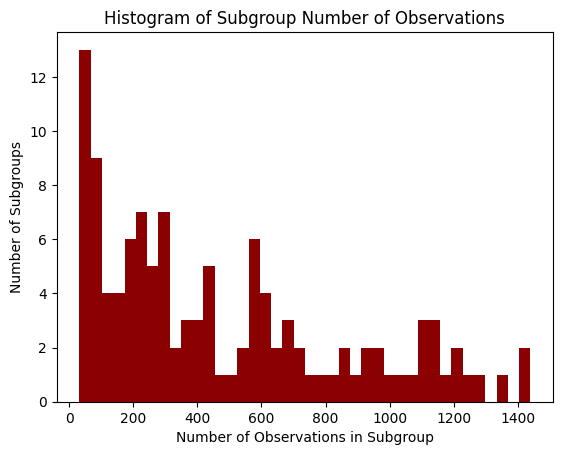

In [15]:
plt.hist(filtered_30.num_obs, color = 'darkred', bins=40)
plt.title('Histogram of Subgroup Number of Observations')
plt.xlabel('Number of Observations in Subgroup')
plt.ylabel('Number of Subgroups')

plt.show()


In [16]:
arr = [.1,.25, .5, .75, .9]

def subsampler(data, filter=0, val=30, rounder=4):
    
    age_ranges = range(20, 61, 5)
    #add range column
    data['Range'] = pd.cut(data['AgeInDays'], age_ranges, right = False, include_lowest=True)

    #make new string columns and convert so that we can concat, then make dummoies off the concats
    data['YRSSCH_str'] = data['YRSSCH'].astype('string')
    data['Range_str'] = data['Range'].astype('string')
    data['Combined'] = data['YRSSCH_str'].str.cat(data['Range_str'], sep=', ')

    datadummy_128 = pd.get_dummies(data['Combined'])

    #if we want to filter, then run this chunk
    if filter == 1:
        datasum_128 = datadummy_128.sum()
        databool_128 = datasum_128 >= val
        datadummysubset_val = datadummy_128.loc[:, databool_128]
        datasample_218 = pd.concat([data[['log_earnings', 'Combined']], datadummysubset_val], axis=1)

    if filter == 0:
        datasample_218 = pd.concat([sample[['log_earnings', 'Combined']], datadummy_128], axis=1)

    df = pd.DataFrame()

    sub_type = pd.Series(dtype='string')
    N_big = len(datasample_218)

    for i in range(0+2, len(datasample_218.columns)):
        
        col_name = datasample_218.columns[i]
        sub_type.loc[len(sub_type)] = col_name

        ruw = pd.Series(dtype='float64')
        subsample_i = datasample_218[datasample_218.iloc[:,i] == 1]
        
        
        N_l = len(subsample_i)
        pee_l = N_l/N_big
        
        conf_int = .80
        if N_l >= 38:
            conf_int = .90
        if N_l >= 52:
            conf_int = .95
        
        for tau in arr:
            #Value at Quantile
            y_tau = subsample_i['log_earnings'].quantile(tau)
            ruw.loc[len(ruw)] = y_tau.astype('float64').round(rounder)

            #Confidence Interval

            #If the order statistics are being messed up, use the values here

            alpha = 1-conf_int
            input = 1-(alpha/2)
            Z_a = stats.norm.ppf(input)
            L = np.sqrt(N_l*(tau)*(1-tau))*Z_a

            #first order stat is indexed to zero, so subtract 1
            lower = math.floor((N_l*tau) - L) -1
            upper = math.ceil((N_l*tau) + L) -1

            le = subsample_i[['log_earnings']]
            le_sorted = le.sort_values('log_earnings')
            le_sorted = le_sorted.reset_index()

            low_bound = le_sorted.loc[lower, 'log_earnings'].astype('float64').round(rounder)
            up_bound = le_sorted.loc[upper, 'log_earnings'].astype('float64').round(rounder)

            ci = (low_bound, up_bound)

            ruw.loc[len(ruw)] = ci

            ##Sigma Hat ^2
            dif = up_bound - low_bound
            dif2 = (dif)**2
            num = N_l*dif2
            den = (4)* ((Z_a)**2)
            sig = num/den
            #a_sig = sig/pee_l
            ruw.loc[len(ruw)] = sig.astype('float64').round(rounder)
        
        ruw.loc[len(ruw)] = conf_int

        new_series = pd.Series(ruw)
        df = pd.concat([df, new_series], axis=1)

    real = df.T
    final =real.reset_index(drop=True)
    final['subtype'] = sub_type

    final = final.rename(columns={0:'10th quantile estimate',
                 1:'10th quantile CI',
                 2:'10th quantile sigma^2 hat',
                 3:'25th quantile estimate',
                 4:'25th quantile CI',
                 5:'25th quantile sigma^2 hat',
                 6:'50th quantile estimate',
                 7:'50th quantile CI',
                 8:'50th quantile sigma^2 hat',
                 9:'75th quantile estimate',
                 10:'75th quantile CI',
                 11:'75th quantile sigma^2 hat',
                 12:'90th quantile estimate',
                 13:'90th quantile CI',
                 14:'90th quantile sigma^2 hat',
                 15:'Confidence %'
                 })

    return (final)

In [17]:
filter_30 = subsampler(sample, filter=1, val=30, rounder=4)
filter_30.head(8)

,10th quantile estimate,10th quantile CI,10th quantile sigma^2 hat,25th quantile estimate,25th quantile CI,25th quantile sigma^2 hat,50th quantile estimate,50th quantile CI,50th quantile sigma^2 hat,75th quantile estimate,75th quantile CI,75th quantile sigma^2 hat,90th quantile estimate,90th quantile CI,90th quantile sigma^2 hat,Confidence %,subtype
0,3.912,"(3.8712, 4.0943)",2.4553,4.4427,"(4.382, 4.6052)",2.4575,4.7875,"(4.7185, 4.7875)",0.2349,5.2983,"(5.2983, 5.2983)",0.0,5.7038,"(5.5215, 5.7683)",3.0047,0.95,"0, [20.0, 25.0)"
1,4.0943,"(3.912, 4.2485)",6.2637,4.6052,"(4.6052, 4.7005)",0.5024,4.9487,"(4.8675, 5.0106)",1.1328,5.4806,"(5.3936, 5.5215)",0.9049,5.9915,"(5.8579, 6.1738)",5.5203,0.95,"0, [25.0, 30.0)"
2,4.1589,"(4.0943, 4.3438)",4.0553,4.6052,"(4.6052, 4.7005)",0.5916,5.0106,"(4.9416, 5.0752)",1.1628,5.4848,"(5.4381, 5.5607)",0.9792,5.9915,"(5.8579, 5.9915)",1.1628,0.95,"0, [30.0, 35.0)"
3,4.382,"(4.1744, 4.382)",2.7515,4.7185,"(4.7005, 4.7185)",0.0207,5.0999,"(5.0499, 5.193)",1.3074,5.5215,"(5.4806, 5.6348)",1.518,5.9915,"(5.8861, 6.0868)",2.5716,0.95,"0, [35.0, 40.0)"
4,4.0943,"(4.0943, 4.2485)",1.6944,4.7185,"(4.6052, 4.7185)",0.9148,5.0499,"(5.0106, 5.124)",0.9164,5.6454,"(5.5215, 5.7038)",2.3683,6.1441,"(6.0403, 6.2146)",2.165,0.95,"0, [40.0, 45.0)"
5,4.0943,"(3.912, 4.3175)",11.9638,4.7185,"(4.6052, 4.7185)",0.934,5.0752,"(5.0106, 5.1358)",1.1405,5.7038,"(5.5984, 5.7038)",0.8083,6.1092,"(5.9915, 6.2146)",3.6215,0.95,"0, [45.0, 50.0)"
6,4.1744,"(4.0943, 4.3175)",3.3751,4.7185,"(4.6052, 4.7185)",0.8697,5.0752,"(5.0106, 5.1358)",1.0619,5.7038,"(5.5491, 5.7038)",1.6213,6.1092,"(6.0307, 6.2146)",2.2912,0.95,"0, [50.0, 55.0)"
7,4.0943,"(4.0943, 4.2485)",1.3772,4.6052,"(4.6052, 4.7005)",0.526,5.0106,"(4.9416, 5.0106)",0.2758,5.5215,"(5.4205, 5.6348)",2.66,5.9915,"(5.8861, 5.9915)",0.6435,0.95,"0, [55.0, 60.0)"


$$ ******----------------------------------------------****** $$
$$ ******------------------- \text{Question 6} ---------------****** $$
$$ ******----------------------------------------------****** $$





$ \text{Question }6 
\\ \text{}
\\ \text{Inspect your standard error estimates. Are any of them are zero? Why? Inspect the distribution of MONTHLY EARNINGS.} 
\\ \text{Is MONTHLY EARNINGS a continuously-valued random variable?}
\\ \text{Relate what you find to the phenomena of standard error estimates of zero [1 paragraph].}$    

In [18]:
bool1 = filter_30['10th quantile sigma^2 hat'] == 0
bool2 = filter_30['25th quantile sigma^2 hat'] == 0
bool3 = filter_30['50th quantile sigma^2 hat'] == 0
bool4 = filter_30['75th quantile sigma^2 hat'] == 0
bool5 = filter_30['90th quantile sigma^2 hat'] == 0

summmation = sum(bool1) + sum(bool2) + sum(bool3) + sum(bool4) + sum(bool5)
summmation

11

<function matplotlib.pyplot.show(close=None, block=None)>

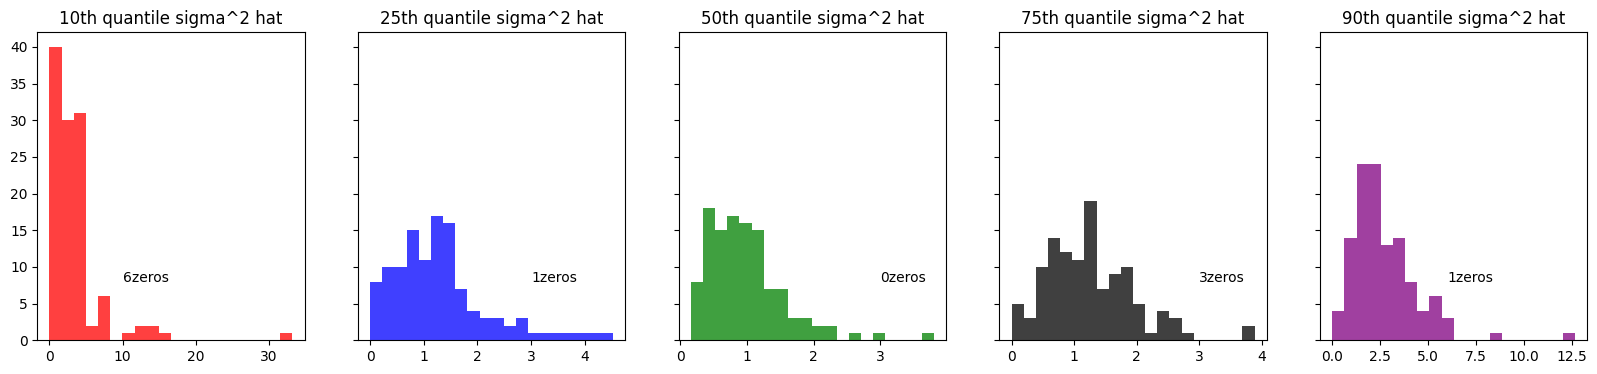

In [19]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

ax1.set_title('10th quantile sigma^2 hat')
ax2.set_title('25th quantile sigma^2 hat')
ax3.set_title('50th quantile sigma^2 hat')
ax4.set_title('75th quantile sigma^2 hat')
ax5.set_title('90th quantile sigma^2 hat')

ax1.hist(filter_30['10th quantile sigma^2 hat'], bins=20, color = 'red', alpha =.75)
ax2.hist(filter_30['25th quantile sigma^2 hat'], bins=20, color = 'blue', alpha =.75)
ax3.hist(filter_30['50th quantile sigma^2 hat'], bins=20, color = 'green', alpha =.75)
ax4.hist(filter_30['75th quantile sigma^2 hat'], bins=20, color = 'black', alpha =.75)
ax5.hist(filter_30['90th quantile sigma^2 hat'], bins=20, color = 'purple', alpha =.75)

ax1.text(10, 8, str(sum(bool1)) + 'zeros')
ax2.text(3, 8, str(sum(bool2)) + 'zeros')
ax3.text(3, 8, str(sum(bool3)) + 'zeros')
ax4.text(3, 8, str(sum(bool4)) + 'zeros')
ax5.text(6, 8, str(sum(bool5)) + 'zeros')

plt.show

In [20]:
q6 = data_sample(sample, filter=1, val=30)
q6.head(5)

,log_earnings,Combined,"0, [20.0, 25.0)","0, [25.0, 30.0)","0, [30.0, 35.0)","0, [35.0, 40.0)","0, [40.0, 45.0)","0, [45.0, 50.0)","0, [50.0, 55.0)","0, [55.0, 60.0)",...,"8, [40.0, 45.0)","8, [45.0, 50.0)","8, [50.0, 55.0)","8, [55.0, 60.0)","9, [20.0, 25.0)","9, [25.0, 30.0)","9, [30.0, 35.0)","9, [35.0, 40.0)","9, [40.0, 45.0)","9, [45.0, 50.0)"
0,6.214608,"8, [40.0, 45.0)",0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,5.888878,"8, [40.0, 45.0)",0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,7.495542,"7, [35.0, 40.0)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7.824046,"15, [35.0, 40.0)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5.416100,"3, [55.0, 60.0)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
min(sample['MONTHLY_EARNINGS']), max(sample['MONTHLY_EARNINGS'])

(4, 50000)

Text(0.5, 1.0, 'Histogram of log(Monthly Earnings)')

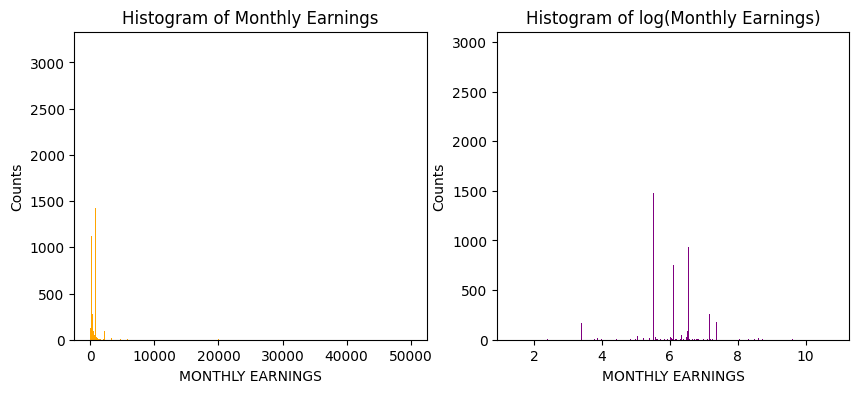

In [22]:
############ 100 BINS 
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharey= False)

x1 = sample['MONTHLY_EARNINGS']
x2 = np.log(x1)


ax0.hist(x1, bins = 5000, color ='orange')
ax1.hist(x2, bins = 5000, color ='purple')

ax0.set_xlabel('MONTHLY EARNINGS')
ax0.set_ylabel('Counts')
ax0.set_title('Histogram of Monthly Earnings')

ax1.set_xlabel('MONTHLY EARNINGS')
ax1.set_ylabel('Counts')
ax1.set_title('Histogram of log(Monthly Earnings)')

$
\\ \text{IMPORTANT: There are two reasons why we might get this, the second explanation is the more important one by far}
\\ \text{Yes, we have 11 spots where the estimated sample variance is zero.}
\\ \text{One way this can happen is if our 'L' is very small, and our resulting ceiling and floor functions calculate the same order statistic.}
\\ \text{}
\\ \text{j = ⌊Nτ − l⌋}
\\ \text{k = ⌈Nτ + l⌉}
\\ \text{if j=k, and we know that:}
\\ \text{σ2 ∗ 4(Z1−(α/2)) = X⌈Nτ+l⌉ − X⌊Nτ−l⌋}
\\ \text{then we will get: σ2 = 0}
\\ \text{}
\\ \text{MORE IMPORTANTLY...}
\\ \text{Investigating MONTHLY EARNINGS, we see that although it is somewhat continuous, there are a lot a lot of values that have a large number of counts}
\\ \text{This gives us another reason why we might see the floor and ceiling functions giving us the same output.}
\\ \text{If we take the percentile, it might land on a spot where there are a large number of counts (tall columns in histogram).}
\\ \text{Even by seperating this chart into 128 charts of individual YRSSCH and AGEBINS pairs, the chance of ending up in one of these tall columns is not triv}
\\ \text{}
\\ \text{The visual explanation above might help better:}
\\ \text{now, even if L isn't that small, adding or subtracting L may keep us in the same column (as we are counting the values at given ranks).}
\\ \text{For example, imagine moving 5 to 10 ranks up or down, in a value with a lot of observations. It is easy to see why we might end up at the same value.}$


$$ ******----------------------------------------------****** $$
$$ ******------------------- \text{Intermission for cleaning and checking} ---------------****** $$
$$ ******----------------------------------------------****** $$



In [23]:
filter_30_nozero = filter_30[(filter_30 != 0).all(1)]
filter_30_yeszero = filter_30[(filter_30.eq(0).any(axis=1))]


print(len(filter_30_nozero), len(filter_30_yeszero))

106 10


116 with 11 zero's, which means that there should be exactly 1 row with two zeros. Let's double check this.

In [24]:
two_zeros = filter_30[(filter_30 == 0).sum(axis=1) == 2]
two_zeros

,10th quantile estimate,10th quantile CI,10th quantile sigma^2 hat,25th quantile estimate,25th quantile CI,25th quantile sigma^2 hat,50th quantile estimate,50th quantile CI,50th quantile sigma^2 hat,75th quantile estimate,75th quantile CI,75th quantile sigma^2 hat,90th quantile estimate,90th quantile CI,90th quantile sigma^2 hat,Confidence %,subtype
73,4.7185,"(4.7185, 4.7185)",0.0,5.2983,"(5.193, 5.2983)",1.0384,5.7038,"(5.7038, 5.7683)",0.3896,6.2146,"(6.2146, 6.2146)",0.0,6.6846,"(6.672, 6.8024)",1.5924,0.95,"4, [35.0, 40.0)"


$$ ******----------------------------------------------****** $$
$$ ******------------------- \text{Question 7} ---------------****** $$
$$ ******----------------------------------------------****** $$





In [25]:
########## order getter

def pi_hatter(data, filter=0, val=30, rounder=4):
    
    age_ranges = range(20, 61, 5)
    #add range column
    data['Range'] = pd.cut(data['AgeInDays'], age_ranges, right = False, include_lowest=True)

    #make new string columns and convert so that we can concat, then make dummoies off the concats
    data['YRSSCH_str'] = data['YRSSCH'].astype('string')
    data['Range_str'] = data['Range'].astype('string')
    data['Combined'] = data['YRSSCH_str'].str.cat(data['Range_str'], sep=', ')

    datadummy_128 = pd.get_dummies(data['Combined'])

    #if we want to filter, then run this chunk
    if filter == 1:
        datasum_128 = datadummy_128.sum()
        databool_128 = datasum_128 >= val
        datadummysubset_val = datadummy_128.loc[:, databool_128]
        datasample_218 = pd.concat([data[['log_earnings', 'Combined']], datadummysubset_val], axis=1)
    

    if filter == 0:
        datasample_218 = pd.concat([sample[['log_earnings', 'Combined']], datadummy_128], axis=1)


    #omerga = np.zeros((n, n))
    arr = [0,3,6,9,12]
    tauz = [.1,.25,.5,.75,.9]
    nums = [0,1,2,3,4]
    
    pi_col = pd.Series(dtype='float64')
    sig_diag = pd.Series(dtype='float64')
    size_series = pd.Series(dtype='float64')
    sub_type = pd.Series(dtype='string')
    
    for i in range(0+2, len(datasample_218.columns)):

        subsample_i = datasample_218[datasample_218.iloc[:,i] == 1]
        
        N_l = len(subsample_i)

        conf_int = .80
        if N_l >= 38:
            conf_int = .90
        if N_l >= 52:
            conf_int = .95

        sig_series = pd.Series(dtype='float64')
        pi_series = pd.Series(dtype='float64')

        for j in nums:
            
            tau = tauz[j]

            alpha = 1-conf_int
            input = 1-(alpha/2)
            Z_a = stats.norm.ppf(input)
            L = np.sqrt(N_l*(tau)*(1-tau))*Z_a

            #### IDK WHY +1 is there, but it is in Bryan's notes
            #### USE -1 because python indexing starts at zero

            j = math.floor((N_l +1)*(tau)) - 1
            le = subsample_i[['log_earnings']]
            le_sorted = le.sort_values('log_earnings')
            le_sorted = le_sorted.reset_index()

            lower = math.floor((N_l*tau) - L) -1
            upper = math.ceil((N_l*tau) + L) -1

            low_bound = le_sorted.loc[lower, 'log_earnings'].astype('float64').round(rounder)
            up_bound = le_sorted.loc[upper, 'log_earnings'].astype('float64').round(rounder)

            up_round = le_sorted.loc[j, 'log_earnings'].astype('float64')
            down_round = le_sorted.loc[j+1, 'log_earnings'].astype('float64')

            pi_hat = (up_round + down_round)/2

            ##Sigma Hat ^2
            dif = up_bound - low_bound
            dif2 = (dif)**2
            num = N_l*dif2
            den = (4)* ((Z_a)**2)
            sig = num/den
            
            sig_series.loc[len(sig_series)] = sig
            pi_series.loc[len(pi_series)] = pi_hat

        if all(sig_series != 0):
            pi_col = pd.concat([pi_col, pi_series], axis=0, ignore_index=True)
            sig_diag = pd.concat([sig_diag, sig_series], axis=0, ignore_index=True)
            
            col_name = datasample_218.columns[i]
            sub_type.loc[len(sub_type)] = col_name
            size_series.loc[len(size_series)] = N_l

            
        else:
            pass

    size_series_530 = size_series.repeat(5).reset_index(drop=True)
    id_530 = sub_type.repeat(5).reset_index(drop=True)
    total = len(size_series_530) 

    tiles = [.1, .25, .5, .75, .9]
    div = len(tiles)
    tiles_530 = pd.Series(np.tile(tiles, int(total/div))).reset_index(drop=True)

    table_fin = pd.DataFrame({'pi_hat': pi_col, 'id': id_530, 'N_l': size_series_530, 'sig^2': sig_diag, 'p-tiles': tiles_530})

    pattern = r'(\d+), \[(\d+).0,\ (\d+)'
    table_fin[['YRZ_SCH', 'X', 'Y']] = table_fin['id'].str.extract(pattern, expand=False)
    table_fin['Age_MP'] = (table_fin['X'].astype(int) + table_fin['Y'].astype(int))/2
    table_fin['Age_MP_sq'] = (table_fin['Age_MP'])**2
    #table_fin['YRS_AGE'] = table_fin['Age_MP']*table_fin['Age_MP_sq']

    return (table_fin)

In [26]:
## OMEGA

def pi_subset_omega (data, tau):
    arr = np.array([.1, .25, .5, .75, .90])
    index = np.where(arr == tau)[0][0]
    table_t = data.iloc[index::5, :]
    n = len(table_t)
    sigtwo_t = table_t['sig^2']
    pee_hat = table_t['N_l']/sum(table_t['N_l'])
    d_series = sigtwo_t/pee_hat 
    diag = np.diag(d_series)
    omega_t =pd.DataFrame(diag, columns=range(1, n+1), index=range(1, n+1))

    return omega_t

In [27]:
######## DESIGN MATRIX G

#Here although the function has tau as an input, it doesnt really change the G matrix. I am just using a dataframe defined before and need to take a subset.
#Make 4 columns: constant, yrssch, age, and age^2


def designer(data, tau):
    pseudo_subset = sm.add_constant(data)
    pseudo_subset = pseudo_subset[pseudo_subset['p-tiles']==tau]
    design = pseudo_subset[['const', 'YRZ_SCH' , 'Age_MP', 'Age_MP_sq']].astype(float)
    #design = design['YRS_AGE'].astype(float)
    target = pseudo_subset['pi_hat'].astype(float)
    return (design, target)

In [28]:
def theta_hatter(data ,tau):

    def pi_subset_omega (data, tau):
        arr = np.array([.1, .25, .5, .75, .90])
        index = np.where(arr == tau)[0][0]
        table_t = data.iloc[index::5, :]
        n = len(table_t)
        sigtwo_t = table_t['sig^2']
        pee_hat = table_t['N_l']/sum(table_t['N_l'])
        d_series = sigtwo_t/pee_hat 
        diag = np.diag(d_series)
        omega =pd.DataFrame(diag, columns=range(1, n+1), index=range(1, n+1))
        W = np.linalg.inv(omega)
        return W

    def designer(data, tau):
        pseudo_subset = sm.add_constant(data)
        pseudo_subset = pseudo_subset[pseudo_subset['p-tiles']==tau]
        design = pseudo_subset[['const', 'YRZ_SCH' , 'Age_MP', 'Age_MP_sq']].astype(float)
        #design = design['YRS_AGE'].astype(float)
        target = pseudo_subset['pi_hat'].astype(float)
        return (design, target)

    omega_t_inv = pi_subset_omega(data, tau)
    design_t, target_t = designer(data, tau)

    p1 = np.linalg.inv(design_t.T @ omega_t_inv @ (design_t.reset_index(drop=True)))
    p2 = (design_t.T @ omega_t_inv @ (target_t.reset_index(drop=True)))
    
    theta_hat = p1 @ p2
    theta_hat = pd.DataFrame(theta_hat).T
    theta_hat = theta_hat.rename(columns={0:'CONSTANT', 1:'YRSSCH', 2:'AGE', 3:'AGE_SQ'})
    #theta_hat = theta_hat.rename(columns={0:'CONSTANT', 1:'YRSSCH', 2:'AGE', 3:'AGE_SQ', 4:'INTER'})

    return theta_hat

In [29]:
def quantiler(data):
    tau = [.1, .25, .5, .75, .9]
    tau_vec = pd.Series(tau)


    df = pd.DataFrame()
    
    for i in tau:
        row = theta_hatter(data , i)
        df = pd.concat([df, row], ignore_index=True)
    
    df = pd.concat([df, tau_vec.T], ignore_index=False, axis=1)
    df = df.rename(columns={0:'QUANTILE'})
    
    return df

In [30]:
##### TWO REGRESSIONS
data_30 = pi_hatter(sample, filter=1, val=30, rounder=4)
data_52 = pi_hatter(sample, filter=1, val=52, rounder=4)

five_quantiles_30 = quantiler(data_30)
five_quantiles_52 = quantiler(data_52)

display(five_quantiles_30)
display(five_quantiles_52)

,CONSTANT,YRSSCH,AGE,AGE_SQ,QUANTILE
0,2.557295,0.127927,0.080697,-0.000911,0.10
1,3.451848,0.131621,0.056483,-0.000610,0.25
2,2.800442,0.147654,0.100813,-0.001047,0.50
3,3.217663,0.161525,0.097721,-0.000957,0.75
4,3.430633,0.154940,0.109500,-0.001082,0.90


,CONSTANT,YRSSCH,AGE,AGE_SQ,QUANTILE
0,2.553504,0.127989,0.080889,-0.000913,0.10
1,3.453096,0.131787,0.056372,-0.000608,0.25
2,2.801039,0.147761,0.100759,-0.001046,0.50
3,3.235609,0.161729,0.096697,-0.000943,0.75
4,3.433190,0.154944,0.109416,-0.001082,0.90


In [31]:
coeffs = np.array(model_results_2.params)
first = coeffs[3:]
second = coeffs[2:-1]
dif = first - second
idk = np.mean(dif)
display(dif, idk)

array([0.20074765, 0.1363736 , 0.13045885, 0.19395906, 0.08558828,
       0.08831735, 0.07664323, 0.1458323 , 0.07317972, 0.11325908,
       0.30151621, 0.24812163, 0.14279148, 0.10089169, 0.399315  ])

0.16246634189980577

$$ ******-----------------\text{Question 7 ANSWER/COMMENT}-----------------------****** $$

$
\\ \text{}
\\ \text{ANSWER: The coefficient ranges between .12 and .16 which does not seem like a lot, even for logged values.} \\ \text{The interpretation of this is that for the 10th quantile, 1 year of schooling results in an increase of .12 in log earnings.}
\\ \text{In comparison to question 2, looking at the code above, I took the different dummy estimates and took their difference in order to gauge the incremental effect of another year.}
\\ \text{This makes sense because the dummy for example 5 would also naturally include 1 through 4.}
\\ \text{We take differences between the coefficients, see that the average difference between the shifted coeffs is .16}
\\ \text{Because q2 was for age 40, we can see how this is reasonable, for it to be toward the higher end of our quantile estimates.}
\\ \text{}
\\ \text{COMMENT: from before: I chose to just filter out everything with less than 52 observations, } \\ \text{as this allows me to use the higher confidence interval of 95.} \\ \\ \text{Looking at the coefficients of regression results, we should feel confident that this does not alter the values too much.}
\\ \text{It also gives better interpretability if all the CI's are the same}$

$$ ******-----------------------------------------------------------------****** $$



In [32]:
#### COEF RATIOS: 90/10

const_ratio = 3.43/2.55
yrssch_ratio = .1549/.1279
age_ratio = .109/.081

display(const_ratio, yrssch_ratio, age_ratio)

1.3450980392156864

1.2111024237685692

1.345679012345679

$$ ******------------------- \text{Question 8} ---------------****** $$

$\\ \text{SHAPE: }
\\ \text{For all 5 percentiles, we can see that the function is positive in both YRSSCH and AGE, with slight negative values for AGESQ.} 
\\ \text{}
\\ \text{MEANING: }
\\ \text{This can be thought of as having increasing returns to YRSSCH and AGE but marginally decreasing returns to AGE.}
\\ \text{}
\\ \text{SUMMARY STATS: }
\\ \text{The values for the constant lie in between 2.5 and 3.5, while values for AGE lie between 0.08 and 0.11, The values for YRSSCH lie between .12 to .16}
\\ \text{}
\\ \text{OBSERVATION 1: }
\\ \text{As we look up our cross section, (Going from lower to higher q-tiles) we see that the Coefficients on the Constant, YRSSCH and AGE are all generally increasing.}
\\ \text{More specifically, taking the ratio of each coefficient of the 90th to the 10th, we see that they are all very similar. This is a somewhat suprising feature if it is true.}
\\ \text{This could imply that as log(earnings) increases from the 10th percentile to the 90th percentile of earners, no component begins to play an outsized role.}
\\ \text{}
\\ \text{OBSERVATION 2: }
\\ \text{Another interesting observation is that the coefficients on the constant are relatively high compared to the other coefs.}
\\ \text{When YRSSCH and AGE are both zero, this is what we expect our log earnings to be.} 
\\ \text{We can hypothesize that because of the impossibility of generating income as a newborn, }
\\ \text{the constant might be capturing starting conditions of someone in the 90th vs 10th percentile.}
\\ \text{These things might include the inheritence of cash-flow generating assets like real estate or company equity.}
\\ \text{This could be an interesting proxy for inequality across different countries. More research should be done to make a definivitive claim though.}
\\ \text{}
\\ \text{OBSERVATION 3: }
\\ \text{The coefs on AGEsq are very low and slightly negative}
\\ \text{Basically, as one gets older, the increases in income slow down} 
\\ \text{}
\\ \text{OBSERVATION 4: }
\\ \text{I ran another version with an interaction term. With the results shown as a screenshot below. The code is commented out in the functions above.}
\\ \text{The interaction is very close to zero, but changes our estimates for AGE to be much smaller, and our estimates for the constant much larger for higher quantiles} 
\\ \text{The estimates on the quantiles now range form 2.5 to 4.5, while the normal YRSSCH remains unchnaged.}
\\ \text{This suggests that age only contributes to log earnings growth conditional on YRSSCH.}$

$$ ******----------------------------------------------****** $$





In [34]:
#%matplotlib inline
#Image('/Users/simitiangreg/Documents/Screen Shot 2023-04-24 at 10.33.59 PM.png', width=500)

In [35]:
def pi_subset_omega_5 (data, tau):
    tau_arr = np.arange(0.05, .96, .01)
    index = np.where(tau_arr == tau)[0][0]
    table_t = data.iloc[index::91, :]
    n = len(table_t)
    sigtwo_t = table_t['sig^2']
    pee_hat = table_t['N_l']/sum(table_t['N_l'])
    d_series = sigtwo_t/pee_hat 
    diag = np.diag(d_series)
    omega =pd.DataFrame(diag, columns=range(1, n+1), index=range(1, n+1))
    W = np.linalg.inv(omega)
    return table_t

In [36]:
########## order getter

def pi_hatter_2(data, filter=0, val=30, rounder=4):
    
    age_ranges = range(20, 61, 5)
    #add range column
    data['Range'] = pd.cut(data['AgeInDays'], age_ranges, right = False, include_lowest=True)

    #make new string columns and convert so that we can concat, then make dummoies off the concats
    data['YRSSCH_str'] = data['YRSSCH'].astype('string')
    data['Range_str'] = data['Range'].astype('string')
    data['Combined'] = data['YRSSCH_str'].str.cat(data['Range_str'], sep=', ')

    datadummy_128 = pd.get_dummies(data['Combined'])

    #if we want to filter, then run this chunk
    if filter == 1:
        datasum_128 = datadummy_128.sum()
        databool_128 = datasum_128 >= val
        datadummysubset_val = datadummy_128.loc[:, databool_128]
        datasample_218 = pd.concat([data[['log_earnings', 'Combined']], datadummysubset_val], axis=1)
    

    if filter == 0:
        datasample_218 = pd.concat([sample[['log_earnings', 'Combined']], datadummy_128], axis=1)


    #omerga = np.zeros((n, n))
    arr = np.arange(0, 3*91, 3)
    tau_arr = np.arange(0.05, .96, .01)
    nums_arr = np.arange(0, 91, 1)
    
    pi_col = pd.Series(dtype='float64')
    sig_diag = pd.Series(dtype='float64')
    size_series = pd.Series(dtype='float64')
    sub_type = pd.Series(dtype='string')
    
    for i in range(0+2, len(datasample_218.columns)):

        subsample_i = datasample_218[datasample_218.iloc[:,i] == 1]
        
        N_l = len(subsample_i)

        conf_int = .80
        # if N_l >= 38:
        #     conf_int = .90
        # if N_l >= 52:
        #     conf_int = .95

        sig_series = pd.Series(dtype='float64')
        pi_series = pd.Series(dtype='float64')

        for j in nums_arr:
            
            tau = tau_arr[j]

            alpha = 1-conf_int
            input = 1-(alpha/2)
            Z_a = stats.norm.ppf(input)
            L = np.sqrt(N_l*(tau)*(1-tau))*Z_a

            #### IDK WHY +1 is there, but it is in Bryan's notes
            #### USE -1 because python indexing starts at zero

            j = math.floor((N_l +1)*(tau)) - 1
            le = subsample_i[['log_earnings']]
            le_sorted = le.sort_values('log_earnings')
            le_sorted = le_sorted.reset_index()

            upper = math.ceil((N_l*tau) + L) -1

            if (math.floor((N_l*tau) - L) -1) < 0:
                lower = upper -1

            else:
                lower = (math.floor((N_l*tau) - L) -1)
            

            low_bound = le_sorted.loc[lower, 'log_earnings'].astype('float64').round(rounder)
            up_bound = le_sorted.loc[upper, 'log_earnings'].astype('float64').round(rounder)

            up_round = le_sorted.loc[j, 'log_earnings'].astype('float64')
            down_round = le_sorted.loc[j+1, 'log_earnings'].astype('float64')

            pi_hat = (up_round + down_round)/2

            ##Sigma Hat ^2
            dif = up_bound - low_bound
            dif2 = (dif)**2
            num = N_l*dif2
            den = (4)* ((Z_a)**2)
            sig = num/den
            
            sig_series.loc[len(sig_series)] = sig
            pi_series.loc[len(pi_series)] = pi_hat

        if all(sig_series != 0):
            pi_col = pd.concat([pi_col, pi_series], axis=0, ignore_index=True)
            sig_diag = pd.concat([sig_diag, sig_series], axis=0, ignore_index=True)
            
            col_name = datasample_218.columns[i]
            sub_type.loc[len(sub_type)] = col_name
            size_series.loc[len(size_series)] = N_l

            
        else:
            pass

    size_series_530 = size_series.repeat(91).reset_index(drop=True)
    id_530 = sub_type.repeat(91).reset_index(drop=True)
    total = len(size_series_530) 

    tiles = tau_arr
    div = len(tiles)
    tiles_530 = pd.Series(np.tile(tiles, int(total/div))).reset_index(drop=True)

    table_fin = pd.DataFrame({'pi_hat': pi_col, 'id': id_530, 'N_l': size_series_530, 'sig^2': sig_diag, 'p-tiles': tiles_530})

    pattern = r'(\d+), \[(\d+).0,\ (\d+)'
    table_fin[['YRZ_SCH', 'X', 'Y']] = table_fin['id'].str.extract(pattern, expand=True)
    table_fin['Age_MP'] = (table_fin['X'].astype(int) + table_fin['Y'].astype(int))/2
    table_fin['Age_MP_sq'] = (table_fin['Age_MP'])**2

    return (table_fin)

In [37]:
def theta_hatter_2(data ,tau):

    def pi_subset_omega_2 (data, tau):
        tau_arr = np.arange(0.05, .96, .01)
        index = np.where(tau_arr == tau)[0][0]
        table_t = data.iloc[index::91, :]
        n = len(table_t)
        sigtwo_t = table_t['sig^2']
        pee_hat = table_t['N_l']/sum(table_t['N_l'])
        d_series = sigtwo_t/pee_hat 
        diag = np.diag(d_series)
        omega =pd.DataFrame(diag, columns=range(1, n+1), index=range(1, n+1))
        W = np.linalg.inv(omega)
        return W, n

    def designer_2(data, tau):
        pseudo_subset = sm.add_constant(data)
        pseudo_subset = pseudo_subset[pseudo_subset['p-tiles']==tau]
        design = pseudo_subset[['const', 'YRZ_SCH' , 'Age_MP', 'Age_MP_sq']].astype(float)
        target = pseudo_subset['pi_hat'].astype(float)
        return (design, target)

    omega_t_inv, n_L = pi_subset_omega_2(data, tau)
    design_t, target_t = designer_2(data, tau)

    p1 = np.linalg.inv(design_t.T @ omega_t_inv @ (design_t.reset_index(drop=True)))
    p2 = (design_t.T @ omega_t_inv @ (target_t.reset_index(drop=True)))

    year_error = np.sqrt(pd.DataFrame(p1).iloc[1, 1])/n_L
    age_error = np.sqrt(pd.DataFrame(p1).iloc[2, 2])/n_L
    
    ####### p1 IS LEGIT M^THETA (GET OUR STANDARD ERRORS FROM HERE)

    theta_hat = p1 @ p2
    theta_hat = pd.DataFrame(theta_hat).T
    theta_hat = theta_hat.rename(columns={0:'CONSTANT', 1:'YRSSCH', 2:'AGE', 3:'AGE_SQ'})
    return theta_hat, year_error, age_error

In [38]:
def quantiler_2(data):
    tau_arr = np.arange(0.05, .96, .01)
    tau_vec = pd.Series(tau_arr)


    df = pd.DataFrame()
    year_errorz = pd.Series()
    age_errorz = pd.Series()
    
    for i in tau_arr:
        row, MB_years, MB_age = theta_hatter_2(data , i)
        df = pd.concat([df, row], ignore_index=True)
        year_errorz.loc[len(year_errorz)] = MB_years
        age_errorz.loc[len(age_errorz)] = MB_age
        
    
    df = pd.concat([df, tau_vec.T], ignore_index=False, axis=1)
    df = df.rename(columns={0:'QUANTILE'})
    
    return df, year_errorz, age_errorz

In [39]:
data_52 = pi_hatter_2(sample, filter=1, val=52, rounder=4)


In [40]:
data_52

,pi_hat,id,N_l,sig^2,p-tiles,YRZ_SCH,X,Y,Age_MP,Age_MP_sq
0,3.912023,"1, [30.0, 35.0)",259,1.824099,0.05,1,30,35,32.5,1056.25
1,4.059848,"1, [30.0, 35.0)",259,4.464139,0.06,1,30,35,32.5,1056.25
2,4.150761,"1, [30.0, 35.0)",259,4.464139,0.07,1,30,35,32.5,1056.25
3,4.219075,"1, [30.0, 35.0)",259,4.665353,0.08,1,30,35,32.5,1056.25
4,4.248495,"1, [30.0, 35.0)",259,3.263227,0.09,1,30,35,32.5,1056.25
...,...,...,...,...,...,...,...,...,...,...
3726,7.495542,"9, [40.0, 45.0)",88,3.495041,0.91,9,40,45,42.5,1806.25
3727,7.659794,"9, [40.0, 45.0)",88,6.436764,0.92,9,40,45,42.5,1806.25
3728,7.824046,"9, [40.0, 45.0)",88,6.436764,0.93,9,40,45,42.5,1806.25
3729,7.824046,"9, [40.0, 45.0)",88,5.292968,0.94,9,40,45,42.5,1806.25


In [41]:
final_answer_9, year_error, age_error = quantiler_2(data_52)
print(len(final_answer_9), len(year_error))


/var/folders/9d/_m9fdg9x3g5b_r_ckwc_cx5c0000gn/T/ipykernel_27166/3264528322.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  year_errorz = pd.Series()
/var/folders/9d/_m9fdg9x3g5b_r_ckwc_cx5c0000gn/T/ipykernel_27166/3264528322.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  age_errorz = pd.Series()


91 91


In [42]:
final_answer_9

,CONSTANT,YRSSCH,AGE,AGE_SQ,QUANTILE
0,2.724786,0.193033,0.029400,-0.000209,0.05
1,2.219960,0.139616,0.071673,-0.000729,0.06
2,1.909590,0.146471,0.087122,-0.000897,0.07
3,1.855271,0.138277,0.100659,-0.001102,0.08
4,1.876012,0.140875,0.100268,-0.001065,0.09
...,...,...,...,...,...
86,3.620546,0.159560,0.088426,-0.000723,0.91
87,3.257413,0.159596,0.109535,-0.000954,0.92
88,3.350925,0.160647,0.105266,-0.000879,0.93
89,3.735142,0.165126,0.088427,-0.000693,0.94


In [43]:
final_answer_9['YRSSCH_bandz_95'] = year_error *1.96
final_answer_9['top_YRS'] = final_answer_9['YRSSCH'] + final_answer_9['YRSSCH_bandz_95']
final_answer_9['bottom_YRS'] = final_answer_9['YRSSCH'] - final_answer_9['YRSSCH_bandz_95']

final_answer_9['AGE_bandz_95'] = age_error *1.96
final_answer_9['top_AGE'] = final_answer_9['AGE'] + final_answer_9['AGE_bandz_95']
final_answer_9['bottom_AGE'] = final_answer_9['AGE'] - final_answer_9['AGE_bandz_95']



final_answer_9.head(5)

,CONSTANT,YRSSCH,AGE,AGE_SQ,QUANTILE,YRSSCH_bandz_95,top_YRS,bottom_YRS,AGE_bandz_95,top_AGE,bottom_AGE
0,2.724786,0.193033,0.029400,-0.000209,0.05,0.016744,0.209777,0.176288,0.037257,0.066657,-0.007857
1,2.219960,0.139616,0.071673,-0.000729,0.06,0.022188,0.161804,0.117428,0.050570,0.122244,0.021103
2,1.909590,0.146471,0.087122,-0.000897,0.07,0.021884,0.168356,0.124587,0.046182,0.133303,0.040940
3,1.855271,0.138277,0.100659,-0.001102,0.08,0.021108,0.159385,0.117169,0.051080,0.151739,0.049579
4,1.876012,0.140875,0.100268,-0.001065,0.09,0.015638,0.156513,0.125236,0.048309,0.148576,0.051959


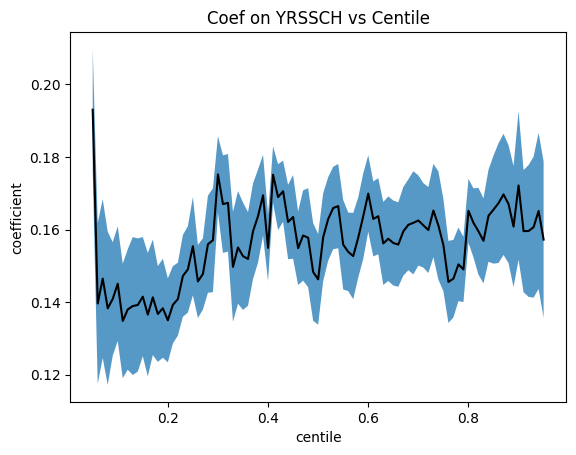

In [44]:
x= final_answer_9['QUANTILE']
y = final_answer_9['YRSSCH']

y_upper = final_answer_9['top_YRS']
y_lower = final_answer_9['bottom_YRS']

plt.plot(x, y,  color='black')
plt.fill_between(x, y_lower, y_upper, alpha=0.75, label='Confidence band')

plt.title('Coef on YRSSCH vs Centile')
plt.xlabel('centile')
plt.ylabel('coefficient')

plt.show()

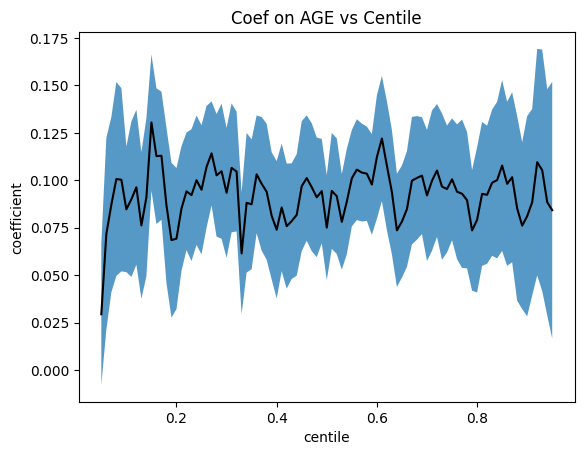

In [45]:
x= final_answer_9['QUANTILE']
y = final_answer_9['AGE']

y_upper = final_answer_9['top_AGE']
y_lower = final_answer_9['bottom_AGE']

plt.plot(x, y,  color='black')
plt.fill_between(x, y_lower, y_upper, alpha=0.75, label='Confidence band')

plt.title('Coef on AGE vs Centile')
plt.xlabel('centile')
plt.ylabel('coefficient')

plt.show()

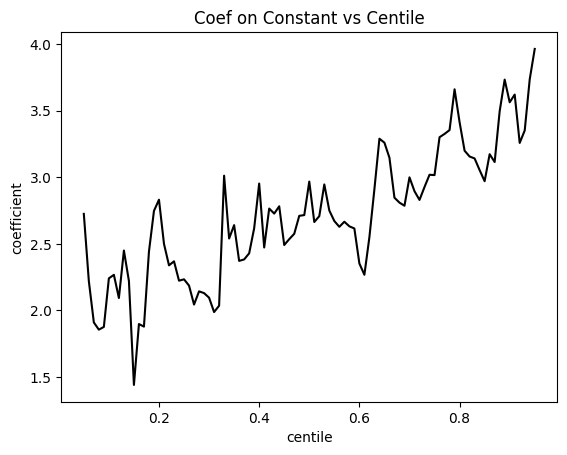

In [46]:
x= final_answer_9['QUANTILE']
y = final_answer_9['CONSTANT']


plt.plot(x, y,  color='black')

plt.title('Coef on Constant vs Centile')
plt.xlabel('centile')
plt.ylabel('coefficient')

plt.show()

$$ ******------------------- \text{Question 8} ---------------****** $$

$\\ \text{SHAPE: }
\\ \text{The coef on YRSSCH is slightly increasing, whereas the coef on AGE seems to not be rising or falling over the percentiles.}
\\ \text{The coef on the constant is clearly increasing over time.} 
\\ \text{}
\\ \text{MEANING: }
\\ \text{Most of these increases occur in the first third of the quantiles however, suggesting that schooling can bring someone to the median earnings, }
\\ \text{but in order to get further up the income distribution, YRSSCH will begin to matter less.} 
\\ \text{The coef on the constant tells a very intersting story. It is basically indicating that the 'base' level for the upper income earners is just so much higher.}
\\ \text{As mentioned before, this phenomenon could be coming from large family inheritences in property or equity, or general connections to high paying jobs.}
\\ \text{Imagine two different citizens who both start working at age 24 after recieving the same college education.}
\\ \text{According to our model, these two people should have the same log earnings, however say there is hidden information: }
\\ \text{}
\\ \text{We can imagine that this hidden information is that one has parents in the 90th quantile, whereas the other has parents in the 10th quantile.}
\\ \text{It would be unrealsitic to imagine that these people would have the same post-college job oppurtunities.}
\\ \text{Here, I am assuming the coef is capturing some information such as parent's background.}
\\ \text{I think this is reasonable, beacuse from the perspective after the model is run, the object that varies most is the coef on the constant.}$


$$ ******----------------------------------------------****** $$



